# Дисциплина: КМСС

# Практика №8

### Теория

Рассматривается закрытый ареал, в котором обитают два вида — травоядные («жертвы») и хищники. Предполагается, что животные не иммигрируют и не эмигрируют, и что еды для травоядных животных имеется с избытком. Тогда уравнение изменения количества жертв (без учёта хищников) принимает вид:

$$ \frac{dx}{dt} = \alpha x. $$

В этом уравнении $\alpha$ — коэффициент рождаемости жертв, $x$ — величина популяции жертв, $\frac{dx}{dt}$ — скорость прироста популяции жертв.

Пока хищники не охотятся, они вымирают. Следовательно, уравнение для численности хищников (без учёта численности жертв) принимает вид:

$$ \frac{dy}{dt} = -\gamma y. $$

Тут $\gamma$ — коэффициент убыли хищников, $y$ — величина популяции хищников, $\frac{dy}{dt}$ — скорость прироста популяции хищников.

При встречах хищников и жертв (частота которых прямо пропорциональна величине $xy$) происходит убийство жертв с коэффициентом $\beta$. Сытые хищники способны к воспроизводству с коэффициентом $\delta$. С учётом этого, система уравнений модели такова:

$$ \begin{equation} \left\{ \begin{array}{}{} \frac{dx}{dt} = \alpha x - \beta xy = (\alpha - \beta y)x; &\\ \frac{dy}{dt} -\gamma y + \delta xy = (\delta x - \gamma)y. \end{array} \right. (1) \end{equation} $$

### Задание

Напишите программы с использованием Python или C# для решения
следующих задач.

In [236]:
import matplotlib.pyplot as plt

#### Задача

Запрограммировать [модель Хищник-жертва (Prey-predator model)](https://kevintshoemaker.github.io/NRES-470/LECTURE17.html) и провести численные эксперименты. Построить график полученных результатов.

##### Функция модели

_Реализуем функцию модели Хищник-жертва наподобие той, что скрыта в ссылке с заданием._

In [237]:
def get_prey_predator_model(
        input_prey_abundance: int, input_predators_abundance: int, 
        alpha: float, beta: float, gamma: float, delta: float, 
        timedelta: float, iterations_number: int
):
    prey_abundance, predator_abundance, timeline = (
        [input_prey_abundance], [input_predators_abundance], [1]
    )
    for t in range(1, iterations_number):
        prey_abundance += [
            (
                    (1 + (alpha - beta * predator_abundance[t - 1]) * timedelta) *
                    prey_abundance[t - 1]
            )
        ]
        predator_abundance += [
            (
                    (1 + (delta * prey_abundance[t - 1] - gamma) * timedelta) *
                    predator_abundance[t - 1]
            )
        ]
        timeline += [t]
    
    return prey_abundance, predator_abundance, timeline

##### Функции для графиков

_Также автоматизируем процесс построения графиков, чтобы лишний раз не повторяться._

In [238]:
def plot_scatter_model(
        prey_abundance: list, predator_abundance: list, 
        x_limit_left: float, y_limit_left: float, x_limit_right: float, y_limit_right
):
    # Drawing the scatter plot
    plt.scatter(prey_abundance, predator_abundance, s=0.1)
    # Marking the first and the last iterations on the plot
    plt.scatter(prey_abundance[0], predator_abundance[0], c="green")
    plt.scatter(prey_abundance[-1], predator_abundance[-1], c="orange")
    
    plt.xlim(x_limit_left, x_limit_right)
    plt.ylim(y_limit_left, y_limit_right)
    plt.title("Prey-predator model")
    plt.xlabel("Prey abundance")
    plt.ylabel("Predator abundance")
    plt.legend(["Population growth", "First iteration", "Last iteration"])
    
    plt.show()

In [239]:
def plot_spline_model(
        prey_abundance: list, predator_abundance: list, timeline: list,
        x_limit_left: float, y_limit_left: float, x_limit_right: float, y_limit_right
):
    # Making the timeline and the abundance arrays share the same first dimension
    if len(prey_abundance) != len(timeline):
        index = len(timeline) - 1
        timeline += [timeline[index]]
    
    # Drawing the spline plot
    plt.plot(timeline, prey_abundance)
    plt.plot(timeline, predator_abundance)
    
    plt.xlim(x_limit_left, x_limit_right)
    plt.ylim(y_limit_left, y_limit_right)
    plt.title("Prey-predator model")
    plt.xlabel("Time")
    plt.ylabel("Abundance")
    plt.legend(["Prey abundance", "Predator abundance"])
    
    plt.show()

##### Медленная циклическая модель

_Введём параметры для так называемой медленной циклической модели. Название мы ей дали на основании точечного графика. На нём отчётливо видно эллипсоид, который с увеличением количества итераций прогрессирует в размере довольно медленно. Интересно так же отметить, что графики, на которых мы изображаем популяции как функции от времени, очень похож графики синусоиды и косинусоиды._

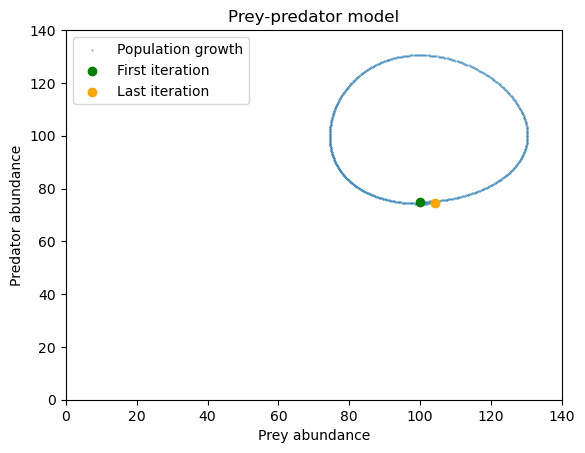

In [240]:
preys, predators, time = get_prey_predator_model(
    100, 75, alpha=0.1, beta=0.001, gamma=0.1, delta=0.001, 
    timedelta=0.1, iterations_number=650
)
plot_scatter_model(
    preys, predators, 
    x_limit_left=0, y_limit_left=0, x_limit_right=140, y_limit_right=140
)

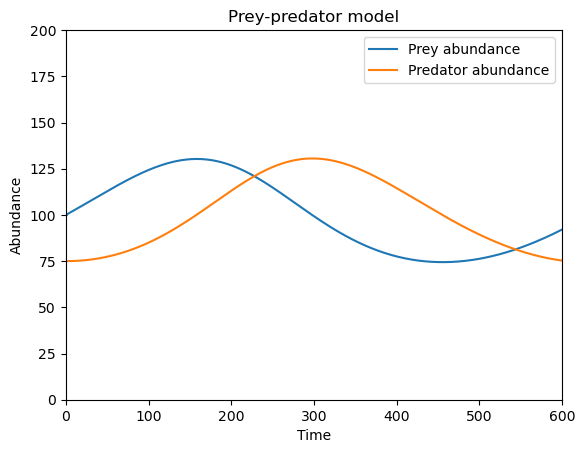

In [241]:
plot_spline_model(
    preys, predators, time,
    x_limit_left=0, y_limit_left=0, x_limit_right=600, y_limit_right=200
)

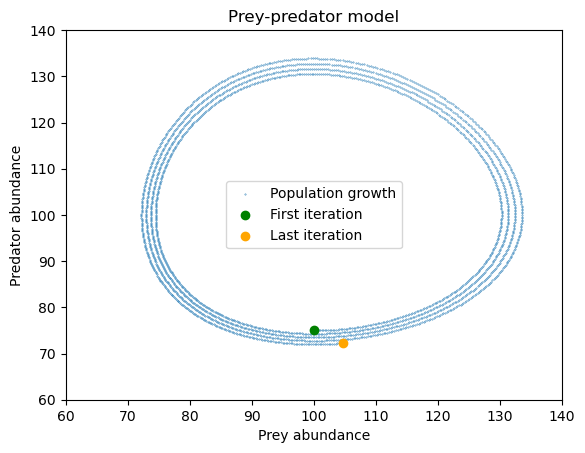

In [242]:
preys, predators, time = get_prey_predator_model(
    100, 75, alpha=0.1, beta=0.001, gamma=0.1, delta=0.001,
    timedelta=0.1, iterations_number=2550
)
plot_scatter_model(
    preys, predators,
    x_limit_left=60, y_limit_left=60, x_limit_right=140, y_limit_right=140
)

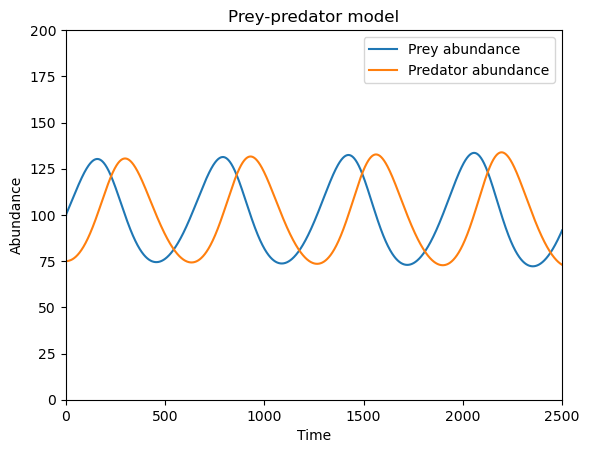

In [243]:
plot_spline_model(
    preys, predators, time,
    x_limit_left=0, y_limit_left=0, x_limit_right=2500, y_limit_right=200
)

##### Треугольная циклическая модель

_Введём параметры модели, точечный график которой похож на треугольник. По графику кривых, где популяции суть функции от времени хорошо видно, что скачки в этой модели намного более резкие. Однако самые скачки и эволюция модели в целом всё так же цикличны. Но в этот раз фигура, что получается из точек, растёт намного быстрее. Это хорошо видно на второй по счёту паре иллюстрация для треугольной модели._

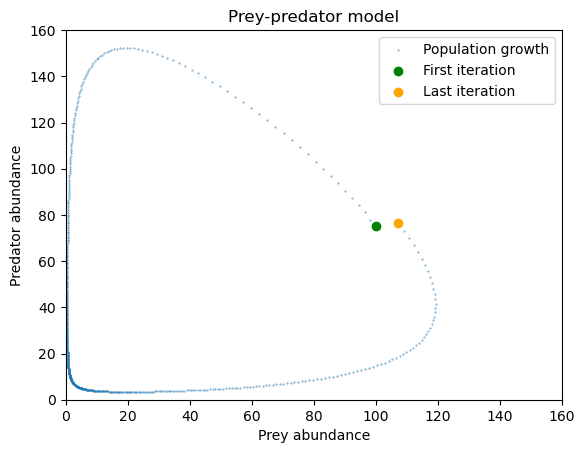

In [244]:
preys, predators, time = get_prey_predator_model(
    100, 75, alpha=0.2, beta=0.005, gamma=0.1, delta=0.005,
    timedelta=0.1, iterations_number=625
)
plot_scatter_model(
    preys, predators,
    x_limit_left=0, y_limit_left=0, x_limit_right=160, y_limit_right=160
)

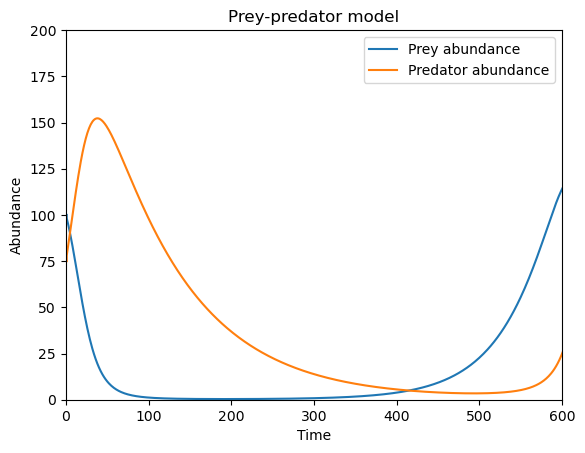

In [245]:
plot_spline_model(
    preys, predators, time,
    x_limit_left=0, y_limit_left=0, x_limit_right=600, y_limit_right=200
)

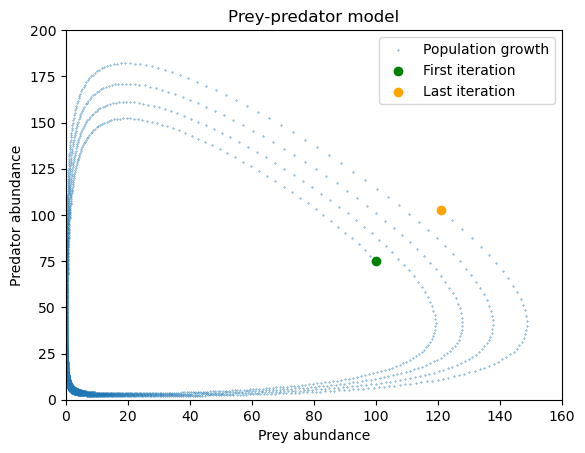

In [246]:
preys, predators, time = get_prey_predator_model(
    100, 75, alpha=0.2, beta=0.005, gamma=0.1, delta=0.005,
    timedelta=0.1, iterations_number=2640
)
plot_scatter_model(
    preys, predators,
    x_limit_left=0, y_limit_left=0, x_limit_right=160, y_limit_right=200
)

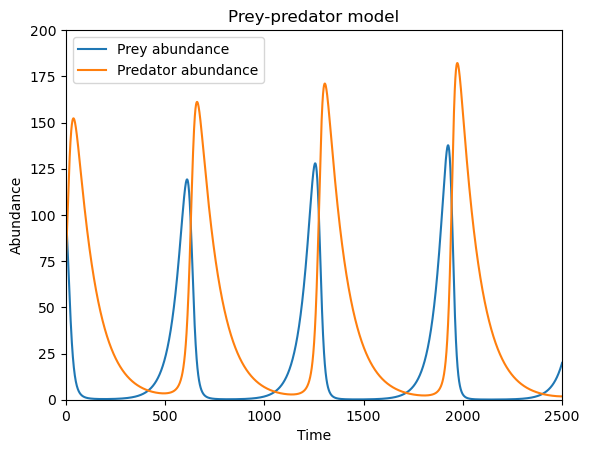

In [247]:
plot_spline_model(
    preys, predators, time,
    x_limit_left=0, y_limit_left=0, x_limit_right=2500, y_limit_right=200
)